In [44]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [45]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [49]:
import tensorflow as tf
import os

In [47]:
os.path.join('data','happy') #its gonna return a file structure which is kind of smae like the os I am using

'data/happy'

In [50]:
gpus = tf.config.experimental.list_physical_devices('GPU') # Avoid OOM errors by setting GPU Memory Consumption Growth
for gpu in gpus: #out of memory
    tf.config.experimental.set_memory_growth(gpu, True)

In [51]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
len(gpus)

0

# **Removing dodgy images**

In [55]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [56]:
!pwd

/content


In [57]:
!mkdir imagel

In [58]:
cd imagel

/content/imagel


In [59]:
from google.colab import files
upload = files.upload()

Saving image_classifier.py to image_classifier.py


In [61]:
data_dir = 'data'

In [62]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os
import zipfile

data_dir = '/content/drive/My Drive/image_classification/data'

for file_name in os.listdir(data_dir):
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(data_dir, file_name), 'r') as zip_ref:
            zip_ref.extractall(data_dir)

In [65]:
import cv2
import imghdr

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)

Image not in ext list /content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list /content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list /content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/depositphotos_83965442-stock-photo-woman-silhouette-watching-sun-in.jpg
Image not in ext list /content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in ext list /content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/portrait-sad-man-600nw-126009806.jpg
Image not in ext list /content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/religious-muslim-man-praying-mosque-260nw-138

In [66]:
!pip install pillow

In [67]:
from PIL import Image
import os

image_exts = ['jpeg', 'jpg']
data_dir = '/content/drive/My Drive/image_classification/data'

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:

                with Image.open(image_path) as img:
                    img.verify()  # Verify that it is an image
                    print(f"{image_path} is a valid image")

                ext = image.split('.')[-1].lower()
                if ext not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except (IOError, SyntaxError) as e:
                print(f"Issue with image {image_path}")
                print(e)
                os.remove(image_path)

/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/353397713.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/240_F_671059717_OAlmXdOfyZiunLuzQqCjZ4FBwa0NZCel.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/360_F_656932563_fVW6zvbCB23Iu5U1F2YjJRnG8SDyUTmm.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/06ac799bbe2a9f3a3a5ae5d2eccf593f_t.jpeg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f4

In [68]:
import os
import imghdr

def validate_images(directory):
    valid_extensions = {'.jpg', '.jpeg', '.png'}
    valid_images = []
    invalid_images = []

    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            ext = os.path.splitext(file)[1].lower()
            if ext in valid_extensions and imghdr.what(file_path) in {'jpeg', 'png'}:
                valid_images.append(file_path)
            else:
                invalid_images.append(file_path)

    print("Valid images:")
    for img in valid_images:
        print(f"{img} is a valid image")

    print("\nInvalid images:")
    for img in invalid_images:
        print(f"Image not in ext list {img}")

# Spifying the directory to validate
directory = '/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc'
validate_images(directory)


Valid images:
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/353397713.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/240_F_671059717_OAlmXdOfyZiunLuzQqCjZ4FBwa0NZCel.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/360_F_656932563_fVW6zvbCB23Iu5U1F2YjJRnG8SDyUTmm.jpg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc/06ac799bbe2a9f3a3a5ae5d2eccf593f_t.jpeg is a valid image
/content/drive/My Drive/image_classification/data/3fc6aeb1-4aa9-4ba1

#**Loading Data**

In [69]:
import numpy as np
from matplotlib import pyplot as plt

In [70]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/image_classification/data')


class_names = data.class_names
print("Class names:", class_names)
print("Number of classes:", len(class_names))

for images, labels in data:
    pass


Found 189 files belonging to 2 classes.
Class names: ['3fc6aeb1-4aa9-4ba1-bfca-b4c346f404fc', '6127c4e3-c662-493a-9c7a-291d08c4c2c3']
Number of classes: 2


In [71]:
data_iterator = data.as_numpy_iterator() #iterating the data cause we can't grab the firt or any oth4r imge or the fitst instance we can say, beasue this isn't a dataset which isn't preloaded into memory, it is actually a generator,
#we need to go grab the data that we want to now easiest way to do it is to use a numpy iterator first,
#it's actually gonna allow us to access or convert the geenrator from our data pipe line.

In [72]:
batch = data_iterator.next() # it continuously pulls the data batches back

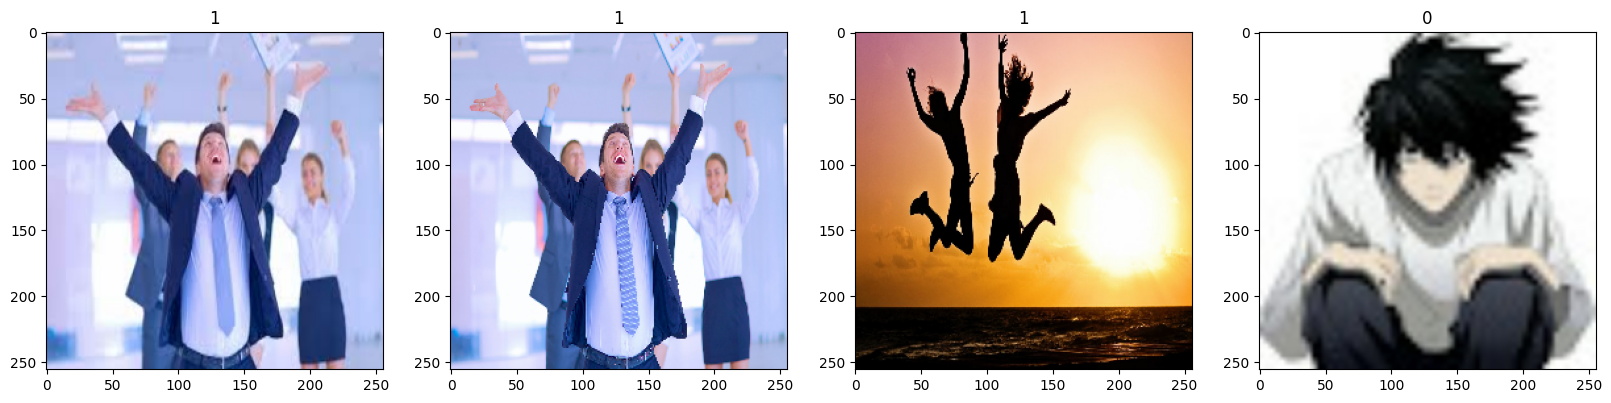

In [73]:
# class 1 = sad ppl
# class 0 = happy ppl, condition apply if we change the batch shape
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #it is use to which class is asigned to which label
for idx, img in enumerate(batch[0][:4]): #as we can see 1 assigned for happy n 0 is fr sad
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

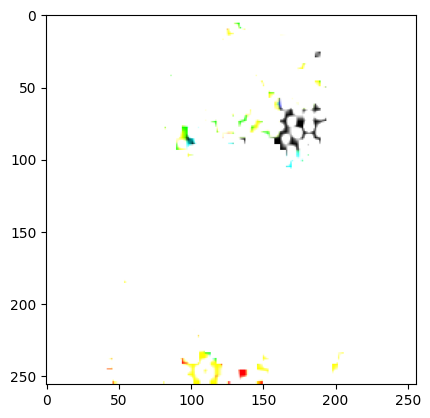

In [75]:
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #it's gonna reorder the channel in the image

#**PREPROCESSING**
#**Scaling the Data**

For Image we tend to pre process by scaling the image value to 0 and 1 rather than 0 to 255
This helps our deep learning model to generalize faster and produces better results.

In [76]:
data = data.map(lambda x,y: (x/255, y)) #map allows me to apply a particular tranformation
#lambda for tranformation, x is image nd y is our target variable

In [77]:
scaled_iterator = data.as_numpy_iterator()

In [79]:
batch = scaled_iterator.next()

In [80]:
batch[0].max() #yeah so if put min then it will show 0 and for max it will show 0.0 it will let us know that that values are from 0 and 1 and it's working totally fine
#our data is scaled and our image are btw 0 and 1

1.0

In [81]:
#everytime we are run this the data values gonna change n we are gonna know the daya is changing
data.as_numpy_iterator().next()

(array([[[[8.82352948e-01, 8.86274517e-01, 8.94117653e-01],
          [8.82352948e-01, 8.86274517e-01, 8.94117653e-01],
          [8.79947901e-01, 8.83869469e-01, 8.91712606e-01],
          ...,
          [8.54901969e-01, 8.54901969e-01, 8.47058833e-01],
          [8.54901969e-01, 8.54901969e-01, 8.47058833e-01],
          [8.47058833e-01, 8.54901969e-01, 8.35294127e-01]],
 
         [[8.82352948e-01, 8.86274517e-01, 8.94117653e-01],
          [8.82352948e-01, 8.86274517e-01, 8.94117653e-01],
          [8.79947901e-01, 8.83869469e-01, 8.91712606e-01],
          ...,
          [8.54901969e-01, 8.54901969e-01, 8.47058833e-01],
          [8.54901969e-01, 8.54901969e-01, 8.47058833e-01],
          [8.54901969e-01, 8.58164847e-01, 8.40533078e-01]],
 
         [[8.82352948e-01, 8.86274517e-01, 8.94117653e-01],
          [8.82352948e-01, 8.86274517e-01, 8.94117653e-01],
          [8.79947901e-01, 8.83869469e-01, 8.91712606e-01],
          ...,
          [8.56418490e-01, 8.56418490e-01, 8.4857

#**Splitting the Data**

In [82]:
train_size = int(len(data)*.7) #we are havin 7 batches and each one them having 32 images
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)# it is use for post training

In [83]:
train_size

4

In [84]:
train = data.take(train_size) # take method defines how much data we are taking in particular partition
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#**Building Deep Learning Model**

---
we are making the deep model using the keras sequential api

---

It have three parts:

---


Building the deep learing model

---


Train

---


Plot performance



In [85]:
from tensorflow.keras.models import Sequential #sequential because if we get one data input and one data output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # maxpooling actuallu goes through the images and condenses it down

In [86]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [87]:
model = Sequential() # functional api it is use if have mutiple inout mutiple outputs multiples connection

In [88]:
#3 convolution blocks, 1 flatten layer and 2 dense layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))#this convo have 16 layers and of 3 by 3pixels
#here relu we are converting any -ve values to zero and + ones remains unchange
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #flatteing the filers are goin to be the last channel amd we are gonna condense the rows and width and the numbers of the filters will form the channel

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #fr sigmoid we are taking all of our data or output and passing it through to modify what the output looks like

In [89]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#**Training part**

In [91]:
logdir='logs'

In [92]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [93]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 17s 3s/step - loss: 1.3544 - accuracy: 0.4375 - val_loss: 0.8666 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 0.7501 - accuracy: 0.6016 - val_loss: 0.6480 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 12s 3s/step - loss: 0.6493 - accuracy: 0.7422 - val_loss: 0.5913 - val_accuracy: 0.9062
Epoch 4/20
4/4 [==============================] - 13s 3s/step - loss: 0.6202 - accuracy: 0.7188 - val_loss: 0.5692 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 0.5349 - accuracy: 0.8047 - val_loss: 0.5478 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 0.4568 - accuracy: 0.7891 - val_loss: 0.4015 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.3653 - accuracy: 0.8594 - val_loss: 0.2320 - val_accuracy: 0.9688
Epoch 8/20
4/4 [==================

In [94]:
hist.history

{'loss': [1.354373574256897,
  0.7500914335250854,
  0.6492982506752014,
  0.6201775074005127,
  0.5349006056785583,
  0.45678359270095825,
  0.36533957719802856,
  0.2825776934623718,
  0.2889765202999115,
  0.3356666564941406,
  0.21330881118774414,
  0.18500740826129913,
  0.18588553369045258,
  0.12929987907409668,
  0.1104600727558136,
  0.09833759814500809,
  0.06323215365409851,
  0.06417419761419296,
  0.047146327793598175,
  0.045918554067611694],
 'accuracy': [0.4375,
  0.6015625,
  0.7421875,
  0.71875,
  0.8046875,
  0.7890625,
  0.859375,
  0.921875,
  0.8671875,
  0.84375,
  0.9375,
  0.9140625,
  0.9296875,
  0.96875,
  0.9765625,
  0.9765625,
  0.9765625,
  0.9765625,
  0.984375,
  0.984375],
 'val_loss': [0.8665527105331421,
  0.6480216979980469,
  0.5912646055221558,
  0.5691691637039185,
  0.5477932691574097,
  0.4014616012573242,
  0.23201438784599304,
  0.1762942373752594,
  0.44821155071258545,
  0.20016619563102722,
  0.14240913093090057,
  0.13098442554473877,
 

#**Plot Performance**

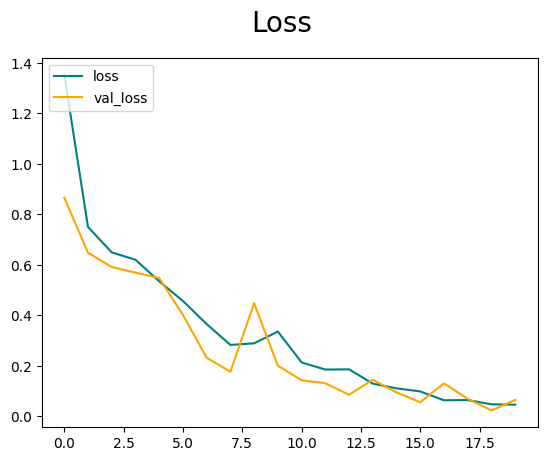

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

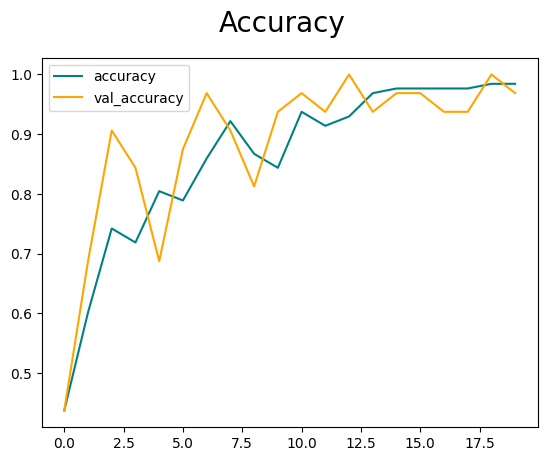

In [96]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#**Evalution**

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [99]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [100]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


#**Testing phase**

In [101]:
import cv2

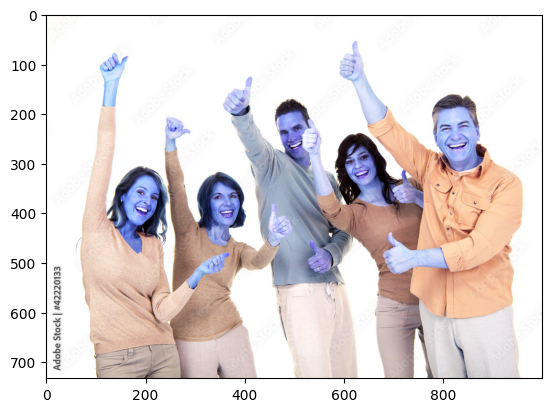

In [102]:
img = cv2.imread('/content/drive/MyDrive/image_classification/data/6127c4e3-c662-493a-9c7a-291d08c4c2c3/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg')
plt.imshow(img)
plt.show()

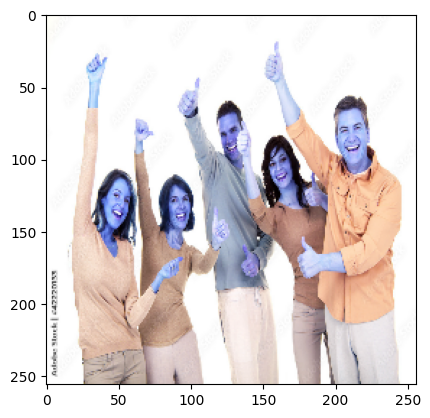

In [103]:
#resizing it
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [104]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 143ms/step


In [105]:
yhat

array([[0.9998357]], dtype=float32)

In [106]:
if yhat > 1:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


#**Saving the model**

In [107]:
from tensorflow.keras.models import load_model

In [116]:
import os
from tensorflow.keras.models import load_model

# Create the directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model in the recommended Keras format
model.save(os.path.join('models', 'imageclassifier.keras'))

# Load the model in the recommended Keras format
new_model = load_model(os.path.join('models', 'imageclassifier.keras'))

# Assuming `resize` is your image data
prediction = new_model.predict(np.expand_dims(resize/255.0, 0))
print(prediction)


1/1 [==============================] - 0s 103ms/step
[[0.9998357]]


In [124]:
import os
from tensorflow.keras.models import load_model

if not os.path.exists('models'):
    os.makedirs('models')

model.save(os.path.join('models', 'imageclassifier.h1'))

new_model = load_model(os.path.join('models', 'imageclassifier.h1'))

# Assuming `resize` is your image data
prediction = new_model.predict(np.expand_dims(resize/255.0, 0))
print(prediction)


1/1 [==============================] - 0s 166ms/step
[[0.9998357]]


In [125]:
import os
from tensorflow.keras.models import load_model

if not os.path.exists('models'):
    os.makedirs('models')

model.save(os.path.join('models', 'imageclassifier.h1'))


In [126]:
new_model = load_model(os.path.join('models', 'imageclassifier.h1'))

In [127]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 132ms/step


array([[0.9998357]], dtype=float32)